In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def show_images(images, titles=None):
    fig, ax = plt.subplots(ncols=len(images), figsize=(len(images)*5,5))

    for idx, image in enumerate(images):
        ax[idx].imshow(image, cmap='gray')
        ax[idx].axis(False)
        if(titles != None):
            ax[idx].set_title(titles[idx])
    return

# 1. versuch

In [2]:
img = cv2.imread("cam1.jpg")


In [4]:
#cv2.imshow("img",img)
#cv2.waitKey()
#cv2.destroyAllWindows()

(1080, 1920, 3)
[[ 84 102  95]
 [ 84 102  95]
 [ 84 102  95]
 ...
 [  1   1   1]
 [  2   2   2]
 [  3   3   3]]
[[ 82 101  92]
 [ 82 101  92]
 [ 82 101  92]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]]
[[ 82 102  89]
 [ 82 102  89]
 [ 83 101  88]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]]


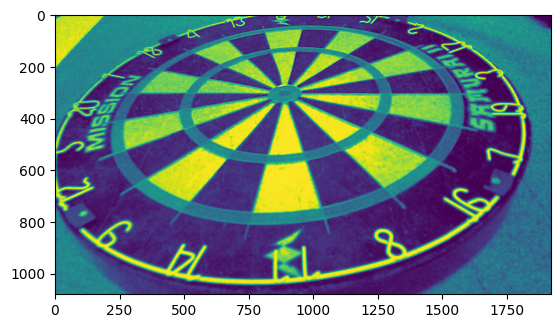

In [3]:
print(img.shape)
print(img[0])
print(img[1])
print(img[2])

plt.imshow(img[...,0])


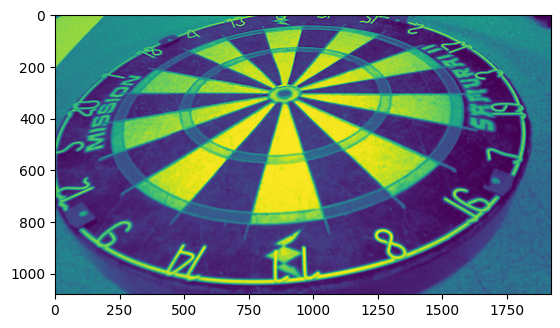

In [4]:
plt.imshow(img[...,1])


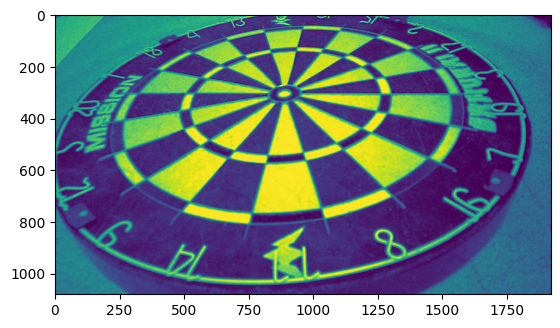

In [7]:
plt.imshow(img[...,2])

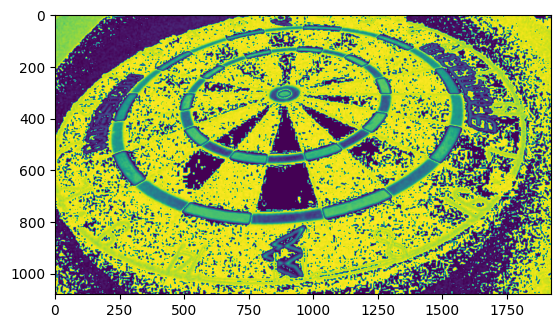

In [8]:
test = img[...,2] - img[...,1]
plt.imshow(test)

In [9]:
import cv2
import numpy as np
import imutils
from skimage import io, img_as_float, exposure


def nothing(x):
    pass


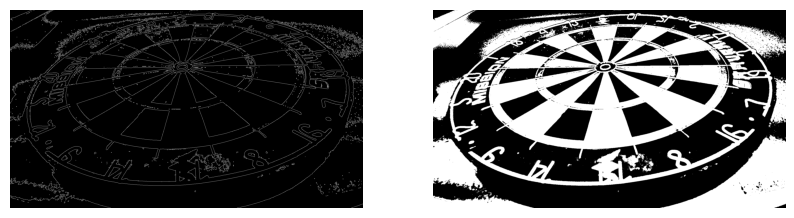

In [10]:
# Load an image
img = cv2.imread('./images/WIN_20240109_20_42_21_Pro.jpg')

# Resize The image
#if img.shape[1] > 600:
#    img = imutils.resize(img, width=600)

# Create a window
#cv2.namedWindow('Treshed')

# create trackbars for treshold change
#cv2.createTrackbar('Treshold','Treshed',0,255,nothing)


#while(1):
  
    # Clone original image to not overlap drawings
clone = img.copy()

# Convert to gray
gray = cv2.cvtColor(clone, cv2.COLOR_BGR2GRAY)

# get current positions of four trackbars
#r = cv2.getTrackbarPos('Treshold','Treshed')
#für dieses Beispiel eignet sich 83 als guter threshold
r = 83

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray,r,255,cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image_1 = cv2.Canny(gray_threshed, 75, 200)

show_images([edge_detected_image_1,gray_threshed])

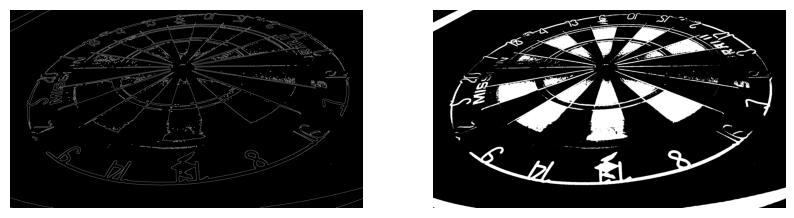

In [11]:
r = 174

# Thresholding the gray image
ret,gray_threshed = cv2.threshold(gray,r,255,cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)

# Detect edges
edge_detected_image_2 = cv2.Canny(bilateral_filtered_image, 75, 200)

show_images([edge_detected_image_2,gray_threshed])


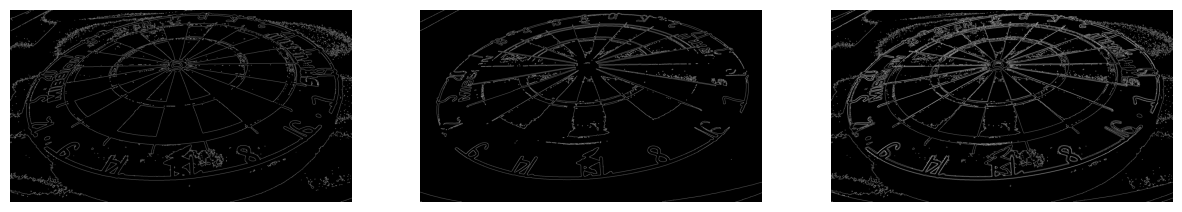

In [12]:

img_combined = edge_detected_image_1 + edge_detected_image_2

show_images([edge_detected_image_1,edge_detected_image_2,img_combined])

True

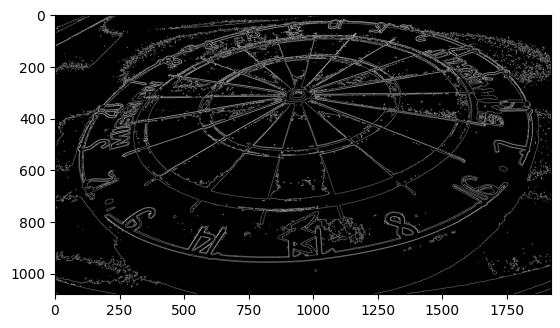

In [13]:
plt.imshow(img_combined, cmap="gray")
cv2.imwrite("edges.png",img_combined)

In [14]:
# Find contours
contours, _ = cv2.findContours(edge_detected_image_1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    # approximte for circles
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)
    
    # Draw contours on the original image
cv2.drawContours(clone, contour_list,  -1, (255,0,0), 2)

# there is an outer boundary and inner boundary for each eadge, so contours double
print('Number of found circles: {}'.format(int(len(contour_list)/2)))

#Displaying the results     
cv2.imshow('Objects Detected', gray_threshed)
#cv2.imshow("Treshed", gray_threshed)
cv2.waitKey()
cv2.destroyAllWindows()    
    # ESC to break
    #k = cv2.waitKey(1) & 0xFF
    #if k == 27:
    #    break

# close all open windows
#cv2.destroyAllWindows()

Number of found circles: 46


In [15]:
#pts1 = np.float32([[286, 305], [958, 43],[1569, 308], [748, 814]])

#cv2.imshow("Treshed", gray_threshed)
cv2.waitKey()
cv2.destroyAllWindows()  

# Andere Herangehensweise zum Bestimmen des Graustufenbilds

float64
(1080, 1920)
bool
(1080, 1920)


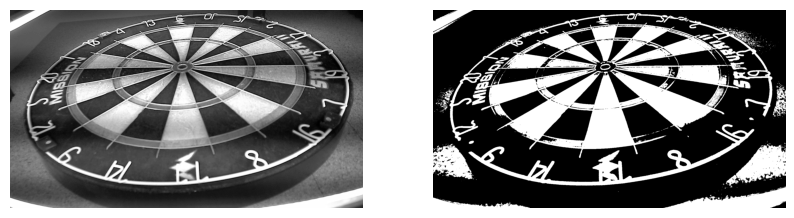

In [3]:
from skimage.filters import threshold_otsu,try_all_threshold,threshold_li
from skimage import io,color


image = color.rgb2gray(io.imread('./images/WIN_20240109_20_42_21_Pro.jpg'))

#thresh = threshold_otsu(image)

thresh = threshold_li(image)
image_bin = image > thresh

print(image.dtype)
print(image.shape)
print(image_bin.dtype)
print(image_bin.shape)


show_images([image,image_bin])

(<Figure size 1000x800 with 8 Axes>,
 array([<AxesSubplot: title={'center': 'Original'}>,
        <AxesSubplot: title={'center': 'Isodata'}>,
        <AxesSubplot: title={'center': 'Li'}>,
        <AxesSubplot: title={'center': 'Mean'}>,
        <AxesSubplot: title={'center': 'Minimum'}>,
        <AxesSubplot: title={'center': 'Otsu'}>,
        <AxesSubplot: title={'center': 'Triangle'}>,
        <AxesSubplot: title={'center': 'Yen'}>], dtype=object))

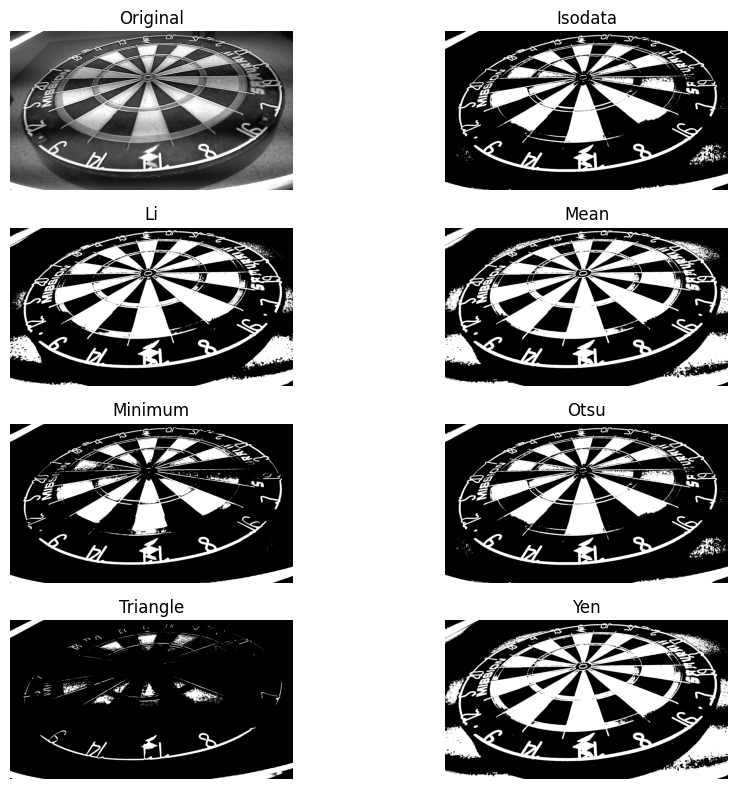

In [17]:
try_all_threshold(image, figsize=(10,8), verbose=False)

NameError: name 'imutils' is not defined

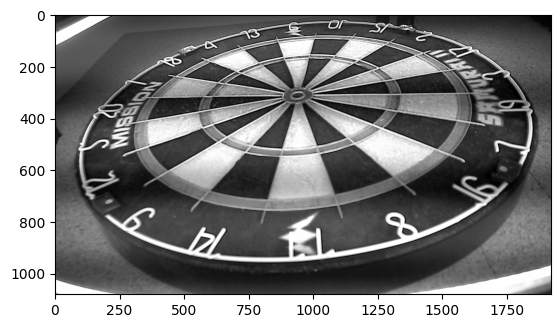

In [6]:
image = cv2.imread('./images/WIN_20240109_20_42_21_Pro.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap="gray")
if image.shape[1] > 600:
    image = imutils.resize(image, width=600)
orig_img = np.copy(image)
image = cv2.medianBlur(image,5)
circles = cv2.HoughCircles(image,cv2.HOUGH_GRADIENT,1,20,param1=150,param2=30,minRadius=150,maxRadius=0)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(orig_img,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(orig_img,(i[0],i[1]),2,(0,0,255),3)


show_images([image,orig_img])

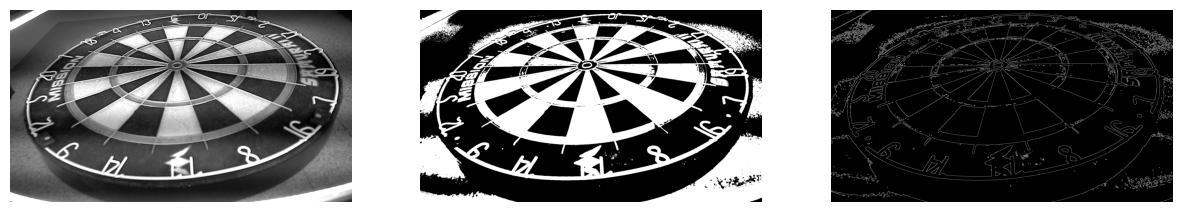

In [20]:
image = cv2.imread('./images/WIN_20240109_20_42_21_Pro.jpg', cv2.IMREAD_GRAYSCALE)

#thresh = threshold_otsu(image)
#image_bin = image > thresh
# Thresholding the gray image

r = 89
#r = 200
ret,gray_threshed = cv2.threshold(image,r,255,cv2.THRESH_BINARY)

# Blur an image
bilateral_filtered_image = cv2.bilateralFilter(gray_threshed, 5, 175, 175)
#imC = exposure.rescale_intensity(image_bin, out_range='uint8')
#in_range='image'
#print(imC.dtype)
#print(imC.shape)

edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
show_images([image,gray_threshed,edge_detected_image])

In [21]:
#pts1 = np.float32([[253, 354], [881, 48],[1538, 252], [892, 811]])
pts1 = np.float32()
points = []



def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
  
        # displaying the coordinates 
        # on the Shell 
        if len(points) < 4:
            points.append([x,y])
            print(x, ' ', y)
        else:
            print("already done")

        # displaying the coordinates 
        # on the image window 
        font = cv2.FONT_HERSHEY_SIMPLEX 
        #cv2.putText(image, str(x) + ',' +str(y), (x,y), font, 1, (255, 0, 0), 2) 
        cv2.circle(image,(x,y),5,(255, 0, 0))
        cv2.imshow('image', image) 


cv2.imshow('image',image)
cv2.setMouseCallback('image', click_event) 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows() 

pts1 = np.float32(points)
print(pts1)
pts2 = np.float32([[540, 0], [0, 540],[540, 1080],[1080, 540]])
print(pts2)
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(image, matrix, (1080, 1080))

flipped = cv2.flip(result, 0)

cv2.imwrite("warped_edges.png",flipped)
cv2.imshow('Warped Image',  flipped)
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows() 

161   380
923   33
1747   227
984   947
[[ 161.  380.]
 [ 923.   33.]
 [1747.  227.]
 [ 984.  947.]]
[[ 540.    0.]
 [   0.  540.]
 [ 540. 1080.]
 [1080.  540.]]
